# **AP155 Lab Assignment**
## Module 5: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Bunachita, Aidan Joseph Q.\
_Student No._: 2020-10991\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Aidan Joseph Quesada Bunachita**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(30 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(20 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(30 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text.

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(20 pts.)*

In [4]:
import numpy as np
from numpy import array, real, conj, linalg

from cmath import exp
from scipy.constants import hbar

import matplotlib.pyplot as plt

M = 9.109/(10**31)          # constants
sigma = 1/(10**10)
kappa = 5*(10**10)

L= 1/(10**8)                # constants for scaling
x0 = L/2
N = 1000
a = L/N
h = 1/(10**18)

def psi(x):                                                   # I. ψ(x) function                                               
    return exp(-(x-x0)**2 / (2*sigma**2))*exp(1j*kappa*x)     # | The wavefunction ψ(x, 0) = e^k * e^{iκx}, where k = -(x - x_0)^2 / 2σ^2

                                                              # II. Constructing ψ(x, 0)
psi_0 = array([psi(n*a) for n in range(1,N)])                 # | creating an array from the list comprehension of all the 999 points of ψ(x,0) from x = a to x = 999a
                                                              # | here, we OMIT ψ(0) and ψ(x), since they don't change over time

a1 = 1 + h*(1j*hbar / (2*M*a**2))                             # |
a2 = -h*(1j*hbar / (4*M*a**2))                                # |  defining constants a_1, a_2, b_1, and b_2 which are involved in defining matrices A and B
b1 = conj(a1)                                                 # |  where b_i = (a_i)* is just a fact about them, as can be seen in Newman
b2 = conj(a2)                                                 # |

                                                              # III. Defining A & B
A = np.diag([a1 for n in range(1,N)])                         # | beginning by defining A as diag(a_1, a_1, ..., a_1) where A must have 999 column vectors (one for each point) 
                                                              # | range(N-1) is ALSO valid; range(1,N) just mimics the pattern of x going from a to 999a
                                                              # |
A += np.diag([a2 for n in range(1,N-1)],k = 1)                # | finishing definition of A by adding the two off-diagonals (one up and one down from main diagonal) each with 998 terms
A += np.diag([a2 for n in range(1,N-1)],k = -1)               # | REMEMBER diag(LIST, k = n) means the matrix where its 'diagonal' n steps up from the main diagonal is LIST
                                                              # |
B = np.diag([b1 for n in range(1,N)])                         # |
B += np.diag([b2 for n in range(1,N-1)],k = 1)                # | Defining B the same way
B += np.diag([b2 for n in range(1,N-1)],k = -1)               # |


                                                              # IV. The Crank-Nicolson Step 
AinvB = np.matmul(linalg.inv(A), B)                           # | From equation Ax = v where v = Bψ, we simplify to x = A^{-1}Bψ, which means we just compute A^{-1}B here
                                                              # | so that in the Crank-Nicolson step, we just multpily psi by AinvB
def diffstep2(psi):                                            
    return np.matmul(AinvB, psi)                              # | Since we've already computed AinvB, we just return [AinvB][ψ]. 
                                                              # | In my device, this is faster: at 2000 steps (skip = 500), they ran at 2.8s versus 1m 18s [NOTE: see Appendix A.]


def diffstepgen(psi_0, skip=1): # Generator for wavefunction vector, which starts with psi_0     
    psi_current = psi_0
    yield psi_current           # first function it yields is psi_0
    i = 1                       # initialize the counter for skipping at 1

    while True:                 # Generator doesn't have any built-in way of terminating (should just yield psi endlessly)

        if i == skip:           # if our skip-counter i equals the skip argument...
            yield psi_current   # ...we yield the current psi vector...
            i = 0               # ...then reset the skip-counter to 0

        psi_current = diffstep1(psi_current) # regardless of whether we yield, we apply diffstep to psi_current every time.
        i += 1                               # move skip-counter forward 


##########################-Old Crank-Nicholson Step-############################
def diffstep1(psi):                                                                           
    v = [b1*psi[0] + b2*psi[1]]                               # | initializing the list for v = Bψ(t) with v1, which is row 1 of B dotted with ψ(t) i.e. b1ψ1 + b2ψ2
                                                              # |
    for k in range(1, N-2):                                   # | computing the middle 997 components... 
        v.append(b1*psi[k] + b2*(psi[k-1] + psi[k+1]))        # | ...where row k of B has (b2, b1, b2) in the (k-1, k, k+1) slots, i.e. will be dotted with ψ(k-1), ψk, ψ(k+1)
                                                              # |
    v.append(b1*psi[N-2] + b2*psi[N-3])                       # | computing 999th component (now, the row ends with b2, b1)
                                                              # | NOTE we avoid creating B explicitly to skip through the trivial parts of the matrix multiplication
                                                              # |
    v = array(v)                                              # | turns v into an array...                                   
    return linalg.solve(A, v)                                 # | then solves the equation Ax = v = Bψ(t) for x.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


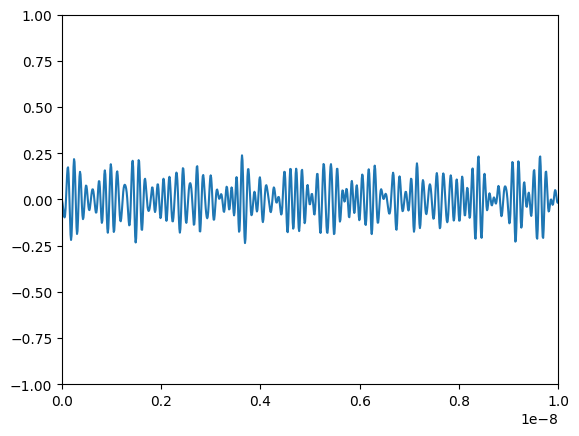

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.display import HTML

frameskip = 200                 
xvals = np.linspace(0,L,N-1)

fig = plt.figure()
ax = plt.axes(xlim = (0,L), ylim = (-1,1))
psi, = ax.plot([],[])
data = diffstepgen(psi_0, skip = frameskip)

def plot(n):
    x, y = xvals, next(data)
    psi.set_data(x,y)
    return psi,

plot_func = plot

ani = anim.FuncAnimation(fig, plot_func, frames=frameskip, interval = 100, blit = True)

HTML(ani.to_html5_video())

Here, the free particle seems like it becomes more 'chaotic' over time. First, as discussed in Griffiths (Problem 2.21, 2.42), the Guassian Wavepacket broadens over time once we tack on its time-dependence, which gives a σ (which determines its width) that's proportional to t. So, as our wavepacket propagates, it not only reflects from the borders but also widens. When it reflects, the part of the wavepacket that's already moving in the opposite direction interferes with the one that's still unreflected, which makes the packet temporarily lose its shape before again looking like a gaussian wavepacket (as can be seen in the first reflection). 

Once it gets wide enough relative to the infinite well, however, it will have a reflected part and a non-reflected part at all times, which interfere with each other. And since it doesn't stop getting wider, the packet is split into more and more sections as it reflects from one wall to the other: one that's unreflected, one that's been reflected once, then twice, then thrice, and so on. The net effect of these sections interfering with each other compounds over time, leading to a wavefunction that gets less and less like a definite wavepacket.

## Appendix

### A. Comparing diffstep1 and diffstep2:

In [5]:
vector = diffstepgen(psi_0,500)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


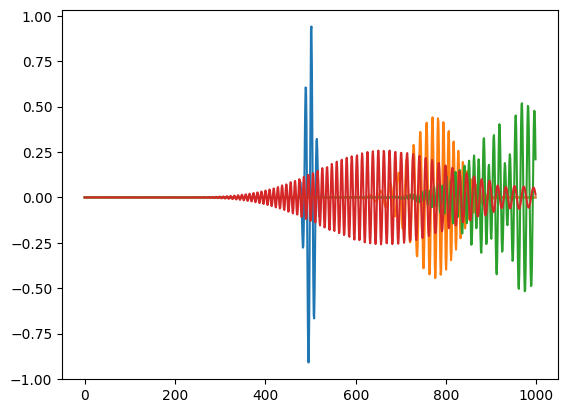

In [3]:
plt.plot(next(vector))
plt.plot(next(vector))
plt.plot(next(vector))
plt.plot(next(vector))

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


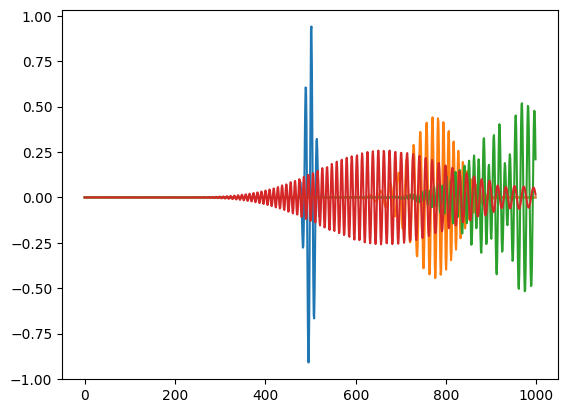

In [6]:
plt.plot(next(vector))
plt.plot(next(vector))
plt.plot(next(vector))
plt.plot(next(vector))